In [7]:
%matplotlib inline
from sklearn import manifold as mani
from sklearn.decomposition import TruncatedSVD
import predictability_svd_final as psf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dataDict,vDict = psf.loadFiles()

## Consolidates the multiple arrays from the loaded dictionary

In [9]:
data = np.empty(shape=(0,dataDict['1'][1].shape[1]))
labels = np.empty(shape=(0,1))
for n,x in enumerate(dataDict):
    print(n)
    inter = np.tile(int(x),dataDict[x][1].shape[0]).reshape(-1,1)
    data = np.vstack((data, dataDict[x][1]))
    labels = np.vstack((labels, inter))

0
1
2
3


4
5


6
7


## Uses SVD and reduces the data to the 3 most important dimensions

In [10]:
%%time
SVD = TruncatedSVD(n_components=3)
t_data = SVD.fit_transform(data)

Wall time: 1.7 s


Plots the 2nd and 3rd dimensions of the SVD

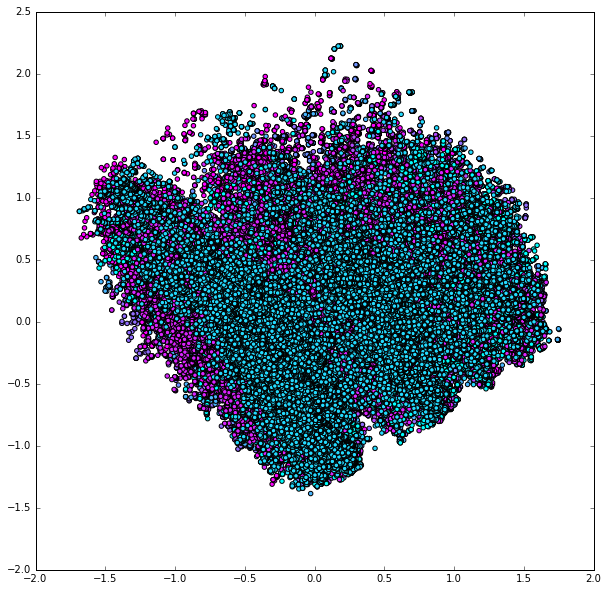

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(t_data[:,1],t_data[:,2], c=labels, cmap='cool' )

Plots the first and 3rd dimensions of the SVD

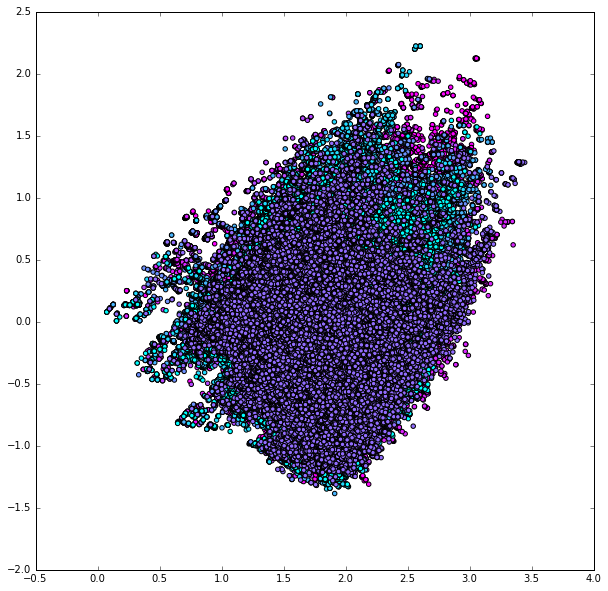

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(t_data[:,0],t_data[:,2], c=labels, cmap='cool' )

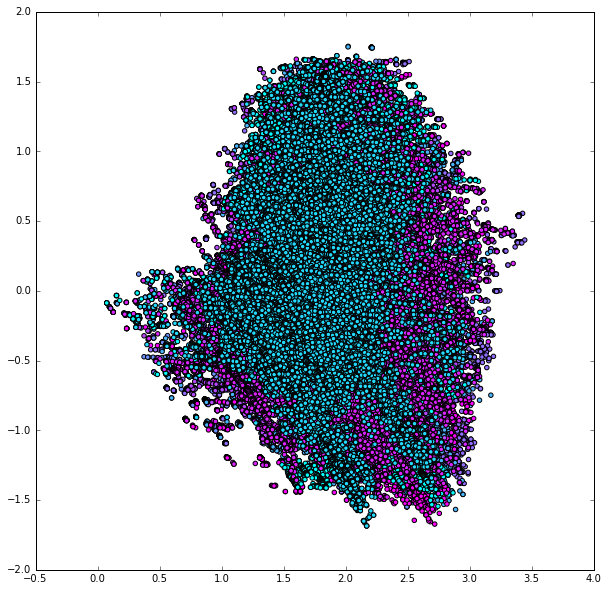

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(t_data[:,0],t_data[:,1], c=labels, cmap='cool' )

## tSNE to 2D space

In [49]:
%%time
random_rows = np.random.choice(data.shape[0], size=20000, replace=False)
reduced_data = data[random_rows, :]
reduced_labels = labels[random_rows,:]
print(reduced_data.shape, reduced_labels.shape)
tsne = mani.TSNE(n_components=2, method='barnes_hut')
t_data_2 = tsne.fit_transform(reduced_data)

(20000, 140) (20000, 1)
Wall time: 12min 41s


tSNE on random dataset of 2000

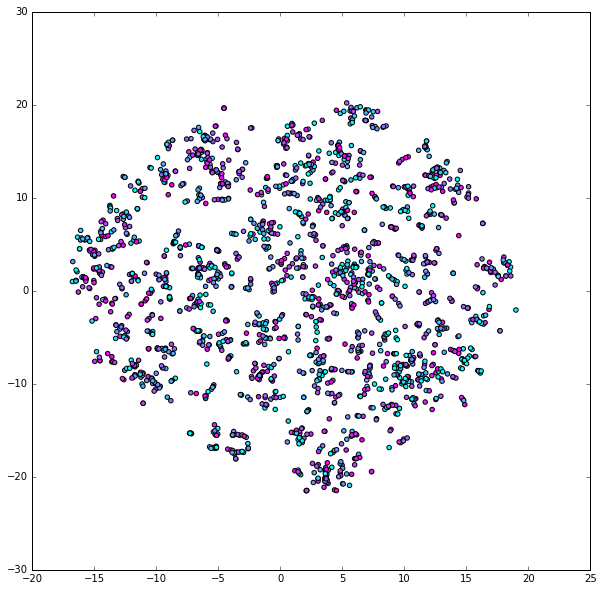

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(t_data_2[:,0],t_data_2[:,1], c=reduced_labels, cmap='cool')

tSNE on random dataset of 5000

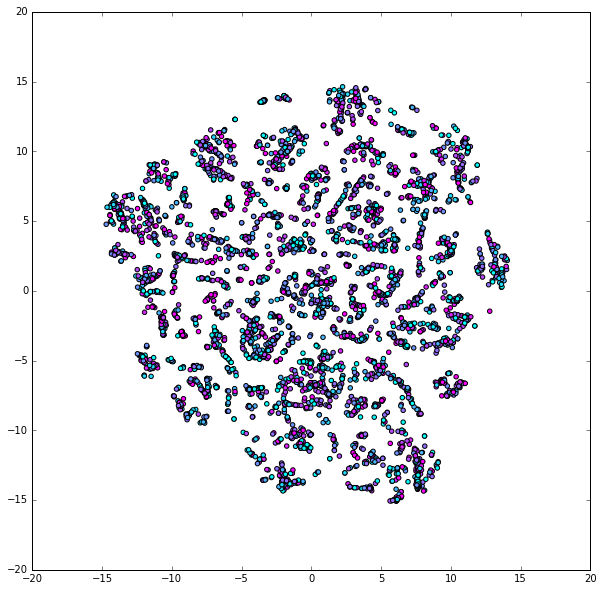

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(t_data_2[:,0],t_data_2[:,1], c=reduced_labels, cmap='cool')

tSNE on random dataset of 20000

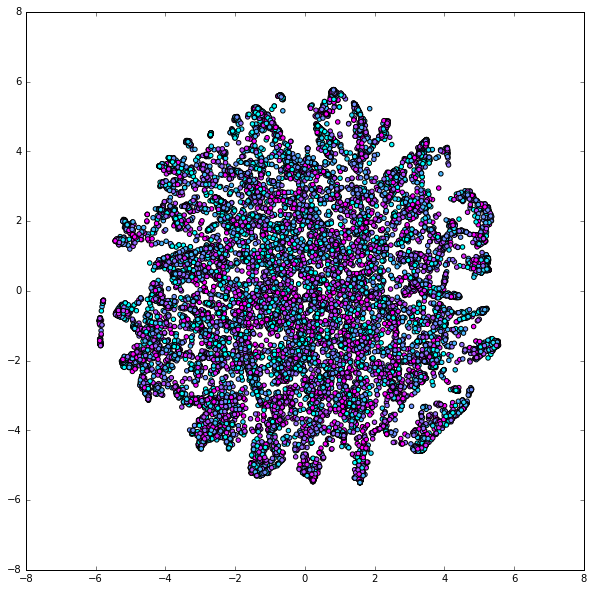

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(t_data_2[:,0],t_data_2[:,1], c=reduced_labels, cmap='cool')